In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tasas=np.array([n/100 for n in range(3,12)] , dtype=float)
tasas

array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11])

In [3]:
#Creando función para calcular la S de la linea CAL
Erp=15/100
sp=22/100
CAL=lambda rf:(Erp-rf)/sp
CALS=list(map(CAL,tasas))

In [4]:
#Imprimiendo los valores de las S para cada tasa libre de riesgo de 3% al 11%
[(str(round((tasa*100),0))+"%",round(cal,4)) for tasa,cal in zip(tasas,CALS)]

[('3.0%', 0.5455),
 ('4.0%', 0.5),
 ('5.0%', 0.4545),
 ('6.0%', 0.4091),
 ('7.0%', 0.3636),
 ('8.0%', 0.3182),
 ('9.0%', 0.2727),
 ('10.0%', 0.2273),
 ('11.0%', 0.1818)]

In [5]:
#y=mx+b intersección eje de la y
#b=(y1-y2)/(x1-x2)
def plot_CAL(i):
    """Función que grafica la recta CAL , para Erp=15%,sp=22% y rf=i"""
    A=(0.22,0.15)
    B=(0,i)
    m=(B[1]-A[1])/(B[0]-A[0])
    den=round(CAL(i),4)
    vector=np.linspace(0,0.22,13)
    plt.plot(vector,[m*x+i for x in vector],label="CAL")
    plt.plot(vector,[0.15 for i in vector],linestyle="dashed")
    RF=[B[1] for i in vector]
    plt.plot(vector,RF,linestyle="dashed")
    rvert=np.linspace(0,0.15,11)
    plt.plot([0.22 for x in rvert],rvert,linestyle="dashed")
    plt.title(f'CAL rf={int(i*100)}%')
    plt.xlabel('σ²')
    plt.ylabel('E(r)')
    a1, b1 =m,i  #y1=a1*x+b1 recta CAL
    a2, b2 = 0,i #CONSTANTE Rf
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue',label=f"S={den}")
    plt.legend(loc="lower left")
    #plt.savefig(f"CAL tasa {i}.jpg") #Correr en caso de guardar las graficas
    plt.show()

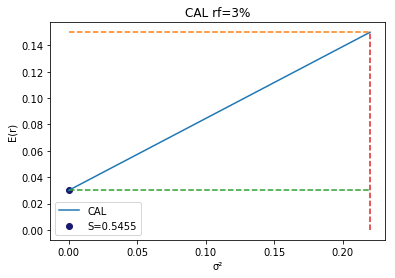

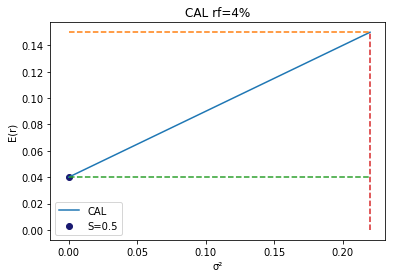

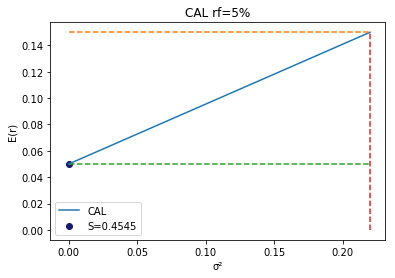

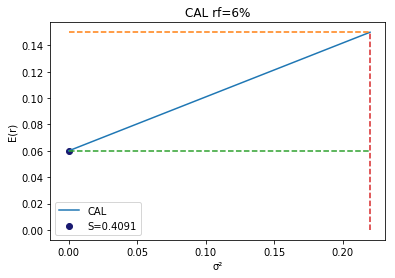

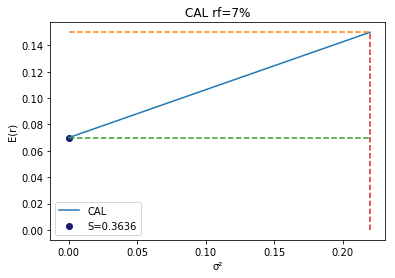

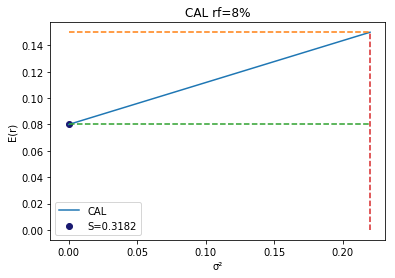

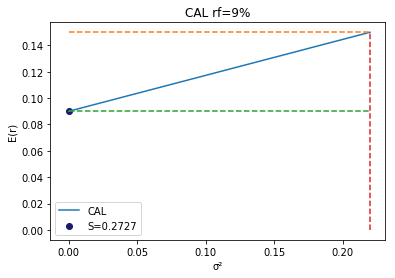

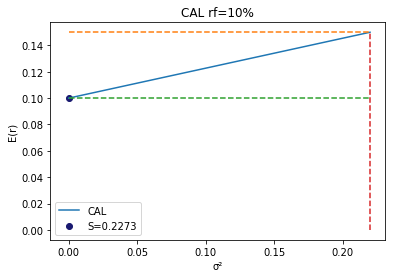

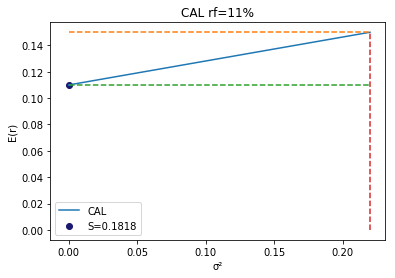

In [6]:
#Graficando la CAL para  cada tasa libre de riesgo que esta entre 3% y 11%
for i in tasas:
    plot_CAL(i)

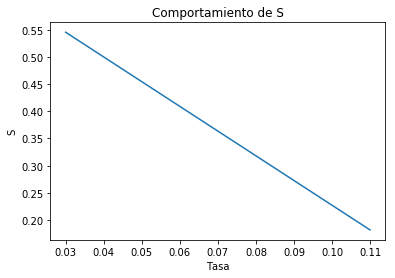

In [7]:
#Comportamiento del valor de S para las tasas que va del 3% al 11%
plt.plot(tasas,CALS)
plt.xlabel('Tasa')
plt.ylabel('S')
plt.title("Comportamiento de S")
plt.show()